# Lending Club Case Study

# Team Member:
# Vishal Kumar Choudhary
# VamsiKrishna Koundinya

In [1]:
## import libraries that are required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the data
loan_data = pd.read_csv(r"C:\Users\choudhv2\Downloads\Lending Club Case Study\loan\loan.csv",low_memory=False)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
## checking data set before proceeding further.
# check shape & datatype of the data set
print(loan_data.shape)
print(loan_data.info())
print(loan_data.dtypes)

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


In [4]:
#loan_data.info()
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


# Starting Data Cleaning 

In [5]:
# Check for duplicate rows in dataset based on id column

print(loan_data.duplicated(subset=None, keep='first').count())
dup=loan_data[loan_data.duplicated(['id'])]
dup

39717


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


We found there is no duplicacy in this data set

In [6]:
# Checking columns that has missing values 
Missing = loan_data.isnull().sum()
#pd.set_option('display.max_rows', None)
print(Missing)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


Observed there are lots of columns that has null values. Removing them before procedding further

In [7]:
# Remove all the column that has null values
loan_data.dropna(axis = 1, how = 'all', inplace = True)
#pd.set_option('display.max_columns', None)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [8]:
# Checking how many zeroes are there in each column
columns_with_zeros =(loan_data == 0).sum()
print(columns_with_zeros)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                 129
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                              0
purpose                           0
title                             0
zip_code                          0
addr_state                        0
dti                             183
delinq_2yrs                   35405
earliest_cr_line                  0
inq_last_6mths              

In [9]:
## Trying to understand which column we removed earlier so that can remove those column as well has too many zeroes only
result = pd.concat([Missing, columns_with_zeros], axis=1)
result.columns = ['Missing', 'Zeros']
print(result)

                            Missing    Zeros
id                                0      0.0
member_id                         0      0.0
loan_amnt                         0      0.0
funded_amnt                       0      0.0
funded_amnt_inv                   0    129.0
...                             ...      ...
tax_liens                        39  39678.0
tot_hi_cred_lim               39717      NaN
total_bal_ex_mort             39717      NaN
total_bc_limit                39717      NaN
total_il_high_credit_limit    39717      NaN

[111 rows x 2 columns]


In [10]:
## Removing those column which has only 0 or Single values

Columns_to_remove = ["tax_liens","desc","pub_rec_bankruptcies","out_prncp","policy_code","out_prncp_inv","mths_since_last_delinq","mths_since_last_record","delinq_amnt","next_pymnt_d","emp_title","url","zip_code","member_id","chargeoff_within_12_mths","acc_now_delinq","collections_12_mths_ex_med"]
loan_data = loan_data.drop(Columns_to_remove,axis=1)
loan_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,INDIVIDUAL
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,INDIVIDUAL
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,INDIVIDUAL
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,INDIVIDUAL


In [11]:
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

# Here we need to see and anlyse who all are like to default in their loan so in this case we can say it only when status is fully paid or charged off loans.

 As we cannot make anything up for the current loans. So for excluding that data , removing the records with current loan status

In [12]:
## Removing rows which indicates only About on going loans

loan_data = loan_data[loan_data.loan_status != "Current"]
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [13]:
# Checking For missing Values
(loan_data.isna().sum()/len(loan_data.index))*100

id                         0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_length                 2.677761
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
pymnt_plan                 0.000000
purpose                    0.000000
title                      0.028514
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.129611
total_acc                  0

# Need to Handle Missing values

Columns with missing values are "emp_length","title","revol_util" and last_pymnt_d

Before working on it trying to understand their data type

In [14]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   loan_amnt                38577 non-null  int64  
 2   funded_amnt              38577 non-null  int64  
 3   funded_amnt_inv          38577 non-null  float64
 4   term                     38577 non-null  object 
 5   int_rate                 38577 non-null  object 
 6   installment              38577 non-null  float64
 7   grade                    38577 non-null  object 
 8   sub_grade                38577 non-null  object 
 9   emp_length               37544 non-null  object 
 10  home_ownership           38577 non-null  object 
 11  annual_inc               38577 non-null  float64
 12  verification_status      38577 non-null  object 
 13  issue_d                  38577 non-null  object 
 14  loan_status           

In [15]:
print("Mode : " + loan_data.emp_length.mode()[0])
loan_data.emp_length.value_counts()

Mode : 10+ years


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

This count shows that the mode value has far higher frequency than that of the next most frequent value. Which means that we can safely assign the value of mode to the null values in the column. Imputung with mode value doesnt affect the analysis much as missing values are in very low percentage

In [16]:
loan_data.emp_length.fillna(loan_data.emp_length.mode()[0], inplace = True)
loan_data.emp_length.isna().sum()

0

In [17]:
loan_data.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan_data.revol_util.isna().sum()

0

# Data Standardizing

int_rate, and revol_util described as an object column where as it has continous values.

int_rate, funded_amnt_inv, installment, annual_inc, dti, emp_length, and total_pymnt these column arguable to be an integer therefore changing their data type too

In [18]:
# Lets remove % symbol from intrest rate column so that it can be used in calculations
loan_data['int_rate'] = loan_data['int_rate'].str.rstrip('%')

# Lets remove % symbol from revol_util column so that it can be used in calculations
loan_data['revol_util'] = loan_data['revol_util'].str.rstrip('%')

As we see "emp_length" --> { (< 1 year) is assumed as 0 and 10+ years is assumed as 10 }

In [19]:
loan_data.emp_length = pd.to_numeric(loan_data.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [20]:
# convert amount columns into numeric data to find some correlation among important ones.
cols1 = ['int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
loan_data[cols1] = loan_data[cols1].apply(pd.to_numeric)

In [21]:
# Lets try and take a look on loan status in total loans issued
(loan_data.loan_status.value_counts()*100)/len(loan_data)

Fully Paid     85.436188
Charged Off    14.563812
Name: loan_status, dtype: float64

Observed 85.44% of loan are fully paid whaeras 14.57% of loan is acharged off and remaining is Current

In [22]:
# Analysing purpose of loan in total loans issued
(loan_data.purpose.value_counts()*100)/len(loan_data)

debt_consolidation    46.832092
credit_card           13.042801
other                  9.998183
home_improvement       7.449321
major_purchase         5.564928
small_business         4.550056
car                    3.885587
wedding                2.400914
medical                1.762400
moving                 1.489864
vacation               0.970748
house                  0.952579
educational            0.835778
renewable_energy       0.264749
Name: purpose, dtype: float64

Observed more than 50% of loan has been taken for debt consolidataion and credit card.

# Univariate Analysis

In [23]:
# Basic statistics with .describe()
print('Loan Amnt Statistics')
print(loan_data.loan_amnt.describe())
print('Total Payment Statistics')
print(loan_data.total_pymnt.describe())

Loan Amnt Statistics
count    38527.000000
mean     11055.265139
std       7348.433587
min        500.000000
25%       5325.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
Total Payment Statistics
count    38527.000000
mean     11876.606662
std       8810.442949
min          0.000000
25%       5519.447680
50%       9685.515720
75%      16147.246055
max      58563.679930
Name: total_pymnt, dtype: float64


Preparing some box plot for review

<Axes: >

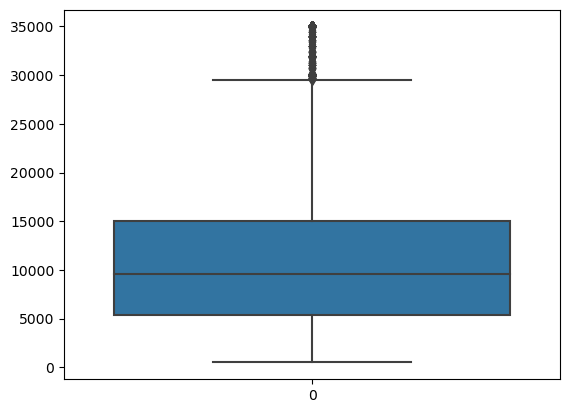

In [24]:
sns.boxplot(loan_data.loan_amnt)

<Axes: >

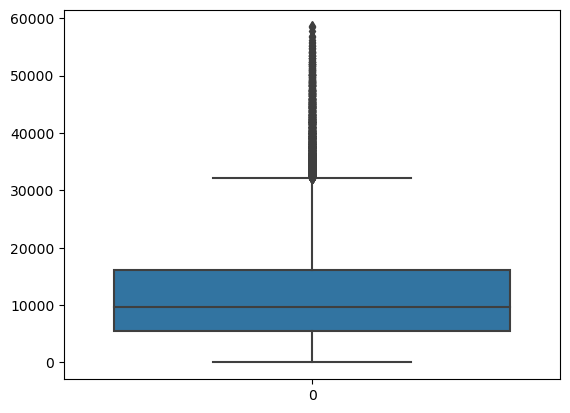

In [25]:
sns.boxplot(loan_data.total_pymnt)

<Axes: >

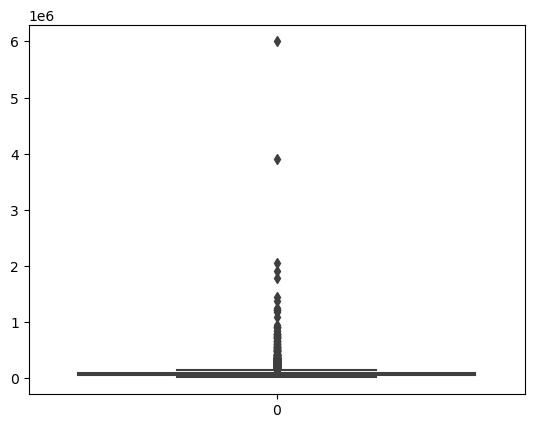

In [26]:
sns.boxplot(loan_data['annual_inc'])

Clearly indincating the presence of outliers.

So, Removing them and Let's try to see the quantile info and take an appropriate action

In [27]:
quantile_info = loan_data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

So after observing above data points considering threshold for removing outliers as 0.95

In [28]:
per_95_annual_inc = loan_data['annual_inc'].quantile(0.95)
loan_data = loan_data[loan_data.annual_inc <= per_95_annual_inc]

<Axes: >

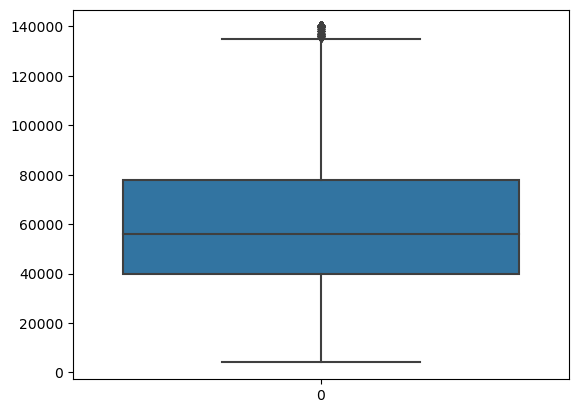

In [29]:
sns.boxplot(loan_data.annual_inc)

<Axes: >

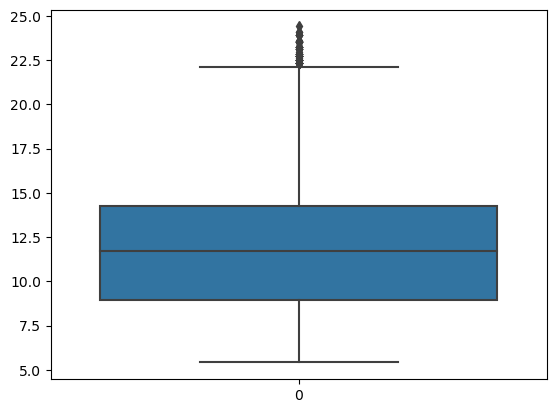

In [31]:
sns.boxplot(loan_data.int_rate)

Using Numerical variables preparing correlation matrix and heatmap with dendogram(clustermap) to show closeness among numerical variables.

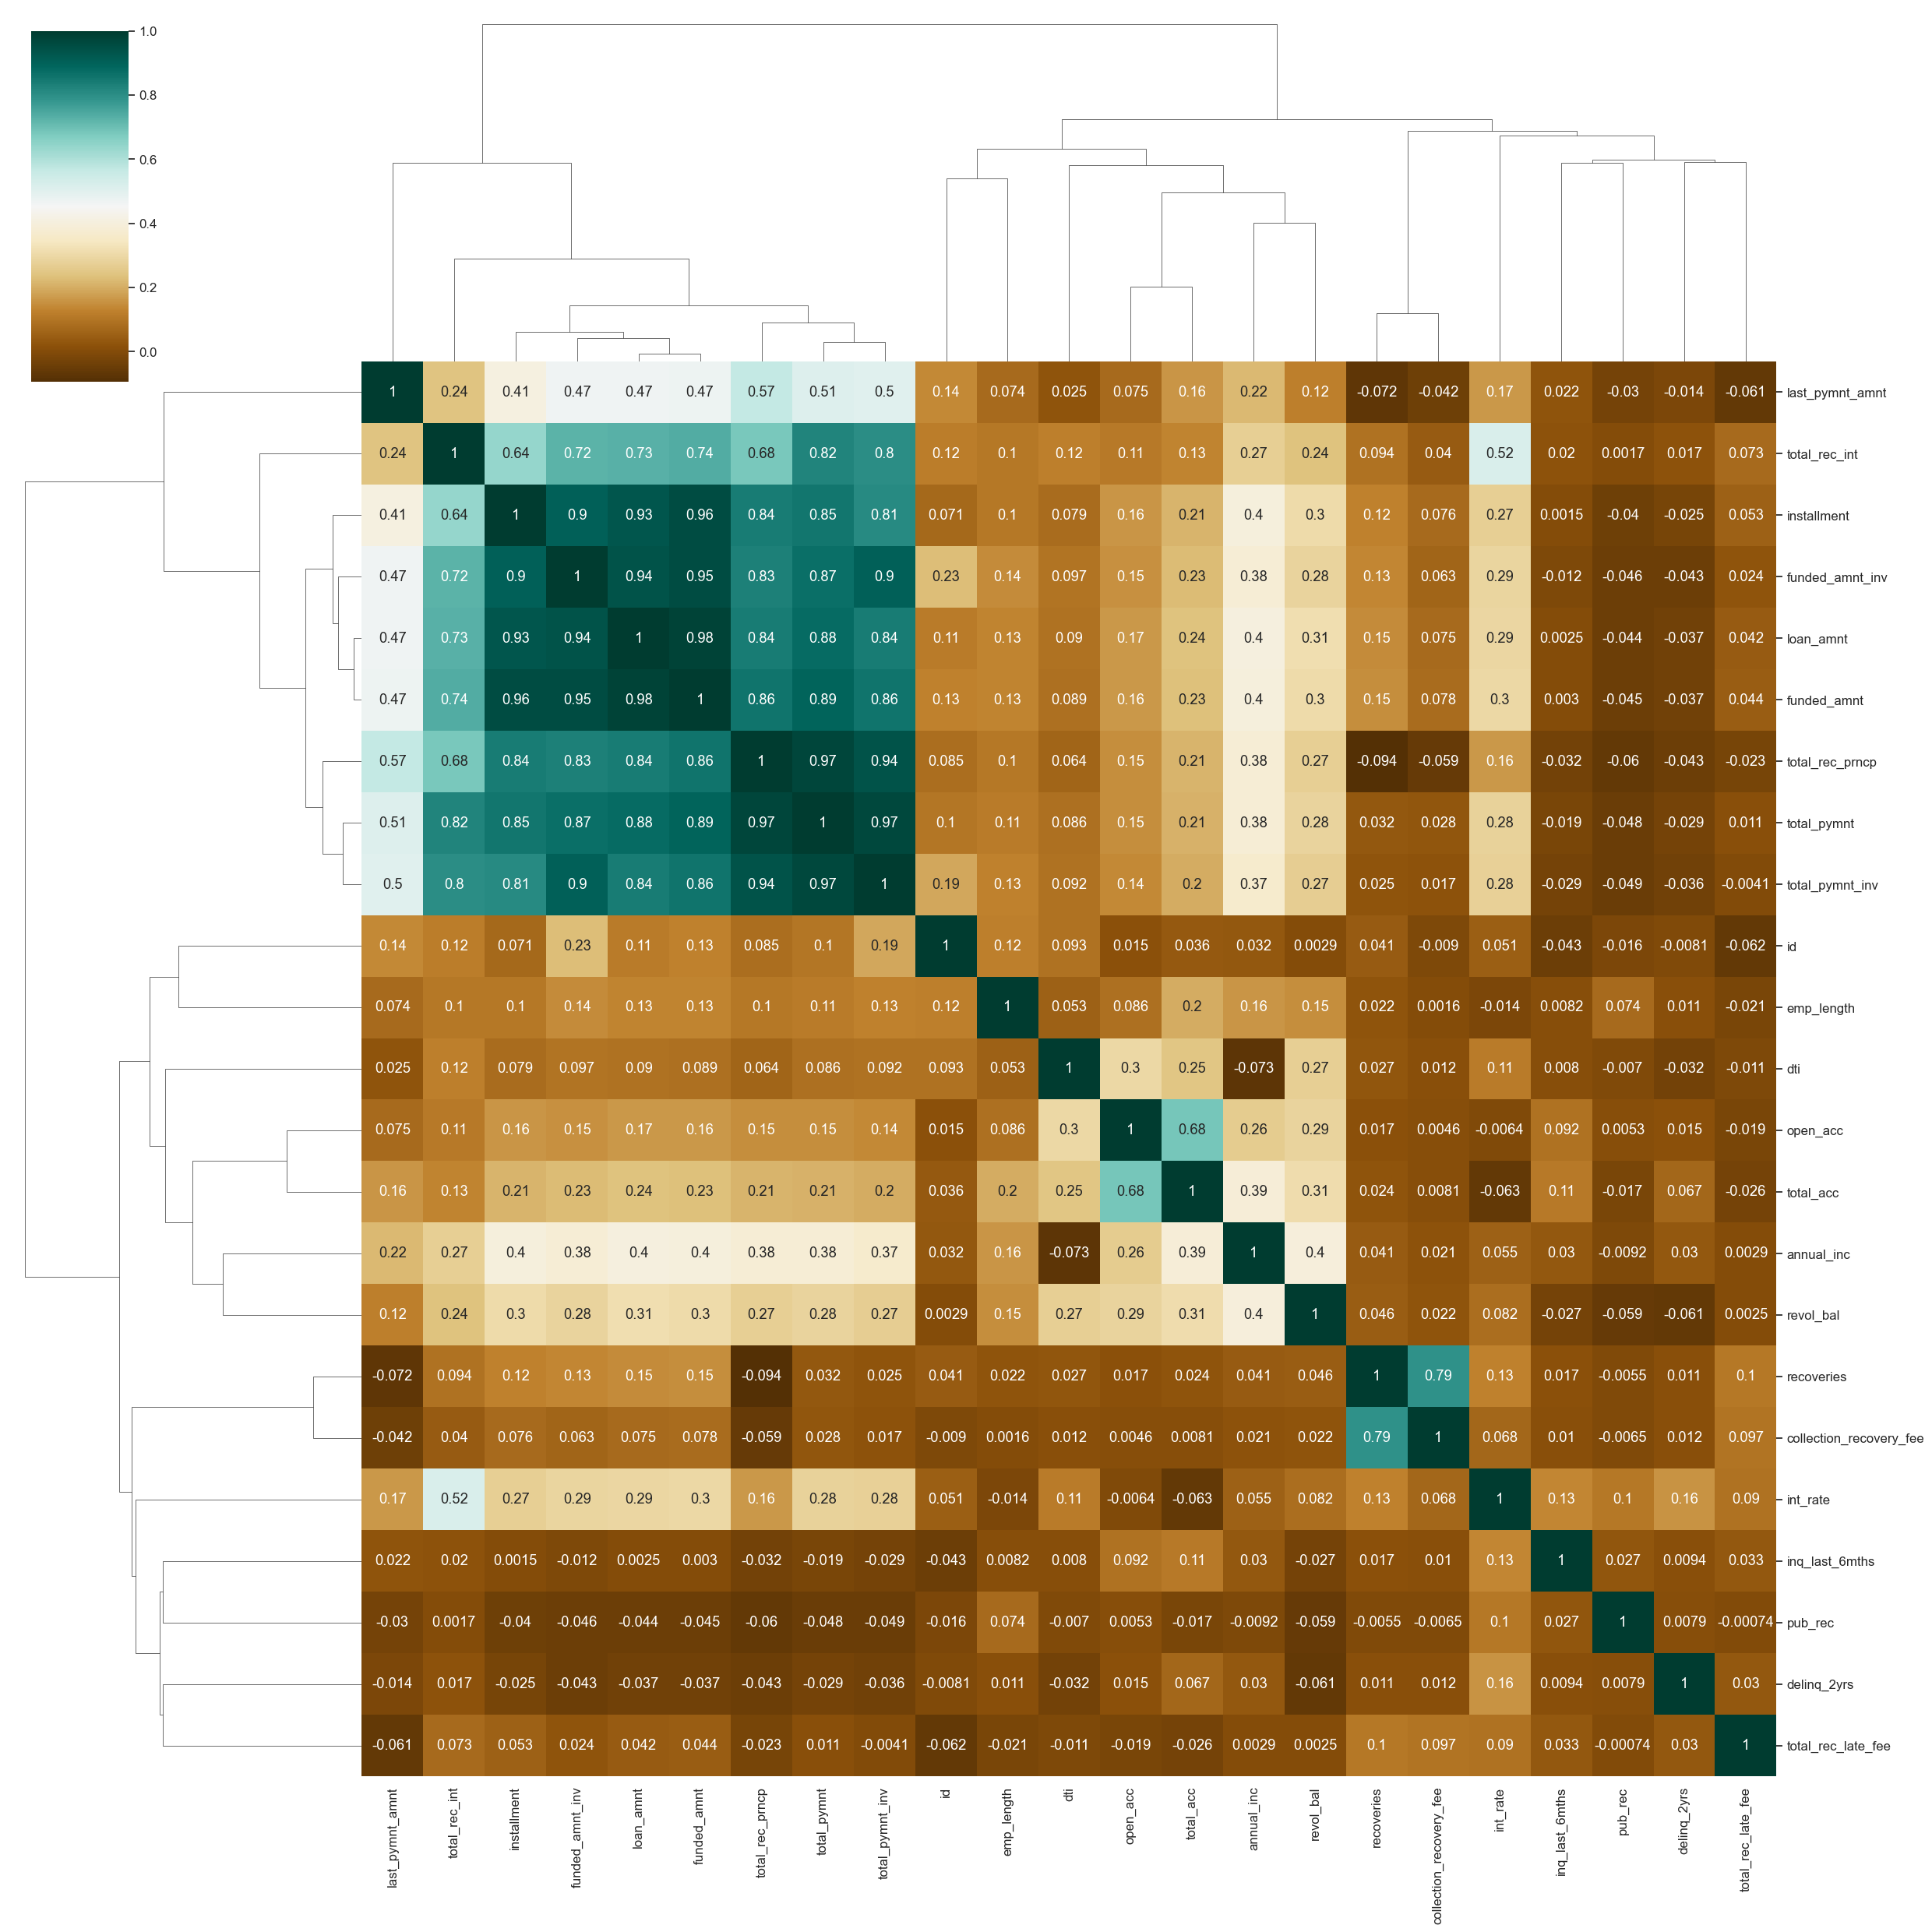

In [32]:
loan_correlation = loan_data.corr(numeric_only=True)
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(25, 25),cmap="BrBG")
plt.show()

Basis of above analysis we can clearly see Loan amount, funding amount and installment are strongly correlated. Annual income with DTI is negatively correalted, so this means means when annual income is low DTI is high & vice versa.

Positive correlation between annual income and employment years which means income increases with work experience

# Analyzing home ownership

<Axes: xlabel='home_ownership', ylabel='count'>

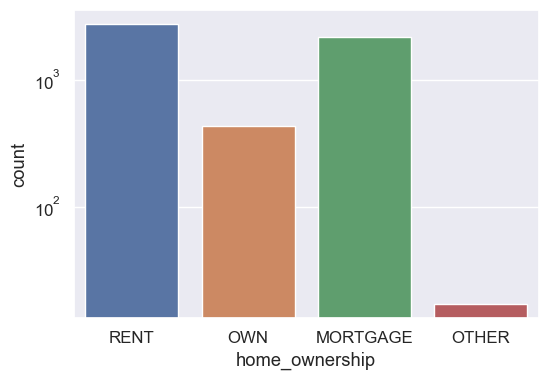

In [33]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan_data[loan_data['loan_status']=='Charged Off'])

# Checking purpose of taking loan

<Axes: xlabel='count', ylabel='purpose'>

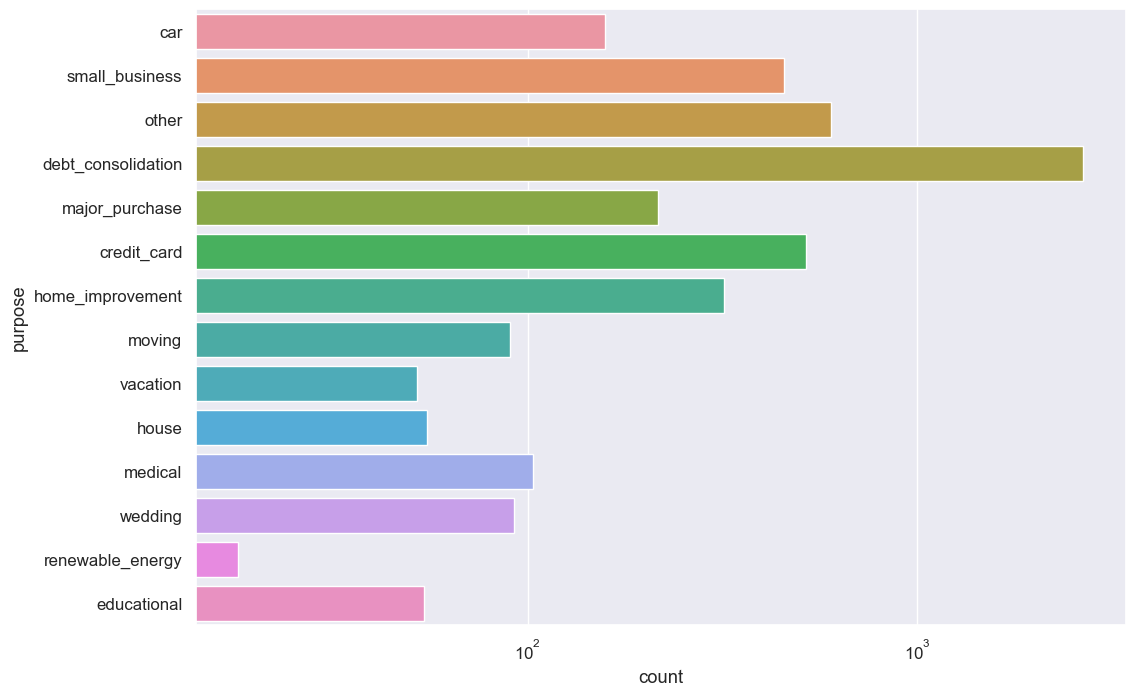

In [34]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan_data[loan_data.loan_status == 'Charged Off'])

In [35]:
# Derived columns

# categorise loan amounts so that we can analyse further in bivariate analysis.
loan_data['loan_amnt_cats'] = pd.cut(loan_data['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes so that we can analyse further in bivariate analysis.
loan_data['annual_inc_cats'] = pd.cut(loan_data['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates so that we can analyse further in bivariate analysis.
loan_data['int_rate_cats'] = pd.cut(loan_data['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

# categorise dti so that we can analyse further in bivariate analysis.
loan_data['dti_cats'] = pd.cut(loan_data['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

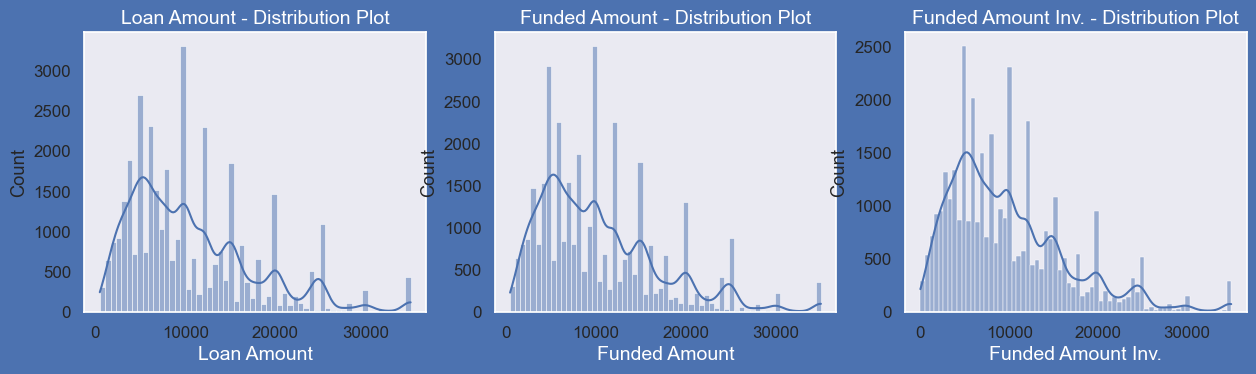

In [36]:
# Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")



# subplot 1
plt.subplot(2, 3, 1)
ax = sns.histplot(loan_data['loan_amnt'],kde = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')

# subplot 2
plt.subplot(2, 3, 2)
ax = sns.histplot(loan_data['funded_amnt'],kde = True)
ax.set_title('Funded Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount',fontsize=14,color='w')

# subplot 3
plt.subplot(2, 3, 3)
ax = sns.histplot(loan_data['funded_amnt_inv'],kde = True)
ax.set_title('Funded Amount Inv. - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount Inv.',fontsize=14,color='w')
plt.show()

Distribution of data for all three looks almost similar.

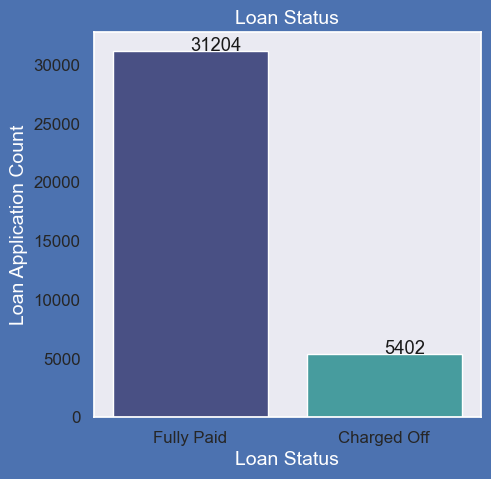

In [37]:
# Loan Status - Unordered Categorical Variables.

plt.figure(figsize=(5,5),facecolor='b')
sns.set_style("dark")
ax = sns.countplot(x="loan_status",data=loan_data,palette='mako')
ax.set_title('Loan Status',fontsize=14,color='w')
ax.set_xlabel('Loan Status',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')            
# To show count of values above bars
s=loan_data['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='k')

In [38]:
5402/31204

0.17311883091911293

Using above graph we can say that almost 17% loans were charged off out of total loan issued.

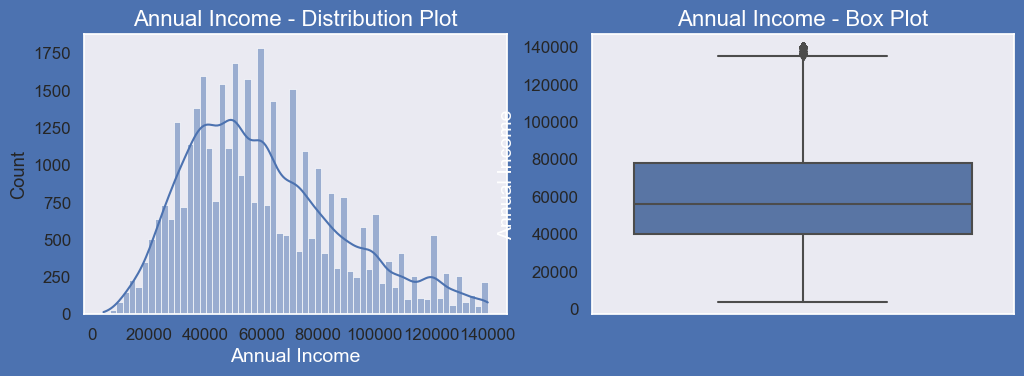

In [39]:
# Annual Income

plt.figure(figsize=(12,8),facecolor='b')
sns.set_style("dark")

# subplot 1
plt.subplot(2, 2, 1)
ax = sns.histplot(loan_data['annual_inc'],kde = True)
ax.set_title('Annual Income - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Annual Income',fontsize=14,color='w')

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Annual Income - Box Plot')
ax = sns.boxplot(y=loan_data['annual_inc'])
ax.set_title('Annual Income - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Annual Income',fontsize=14,color='w')
plt.show()

# Observations :
# Below plots show that most of the borrower's Annual incomes are in range of 40000- 80000

Through above graph we can see that most of the borrower's Annual incomes are in range of 40000- 80000

# Analysing annual income with other columns for more insights

Annual income vs loan purpose

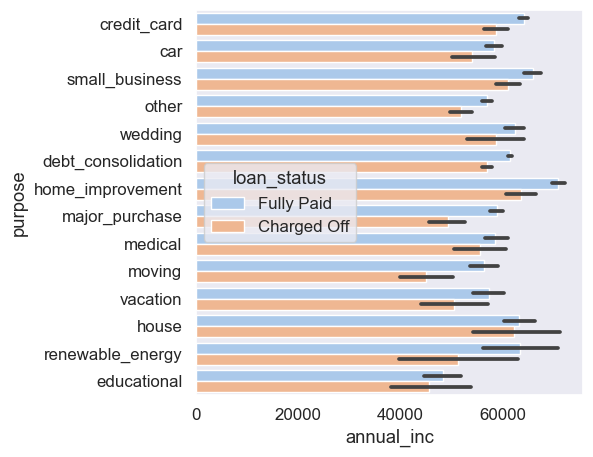

In [40]:
plt.figure(figsize=(5,5))
sns.barplot(data =loan_data,x='annual_inc', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

Annual income vs home ownership

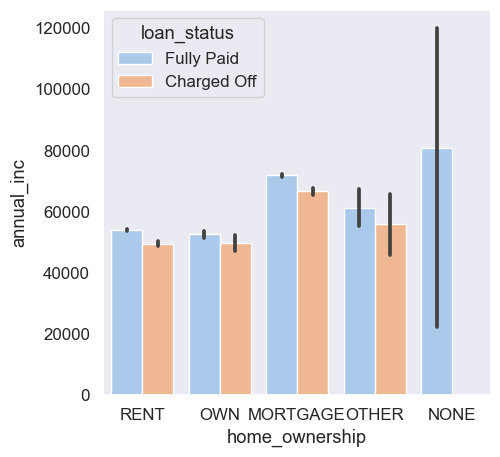

In [41]:
plt.figure(figsize=(5,5))
sns.barplot(data =loan_data,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

Annual income vs int_rate

In [42]:
#creating bins for int_rate,open_acc,revol_util,total_acc
loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_data['open_acc_groups'] = pd.cut(loan_data['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan_data['total_acc_groups'] = pd.cut(loan_data['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
loan_data['loan_amnt_groups'] = pd.cut(loan_data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])

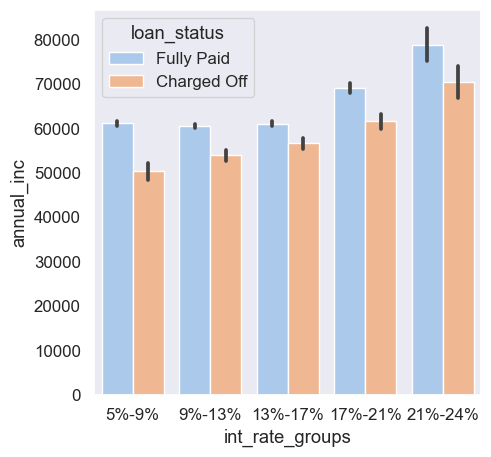

In [43]:
plt.figure(figsize=(5,5))
sns.barplot(data =loan_data,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

Loan Amount vs Interest Rate

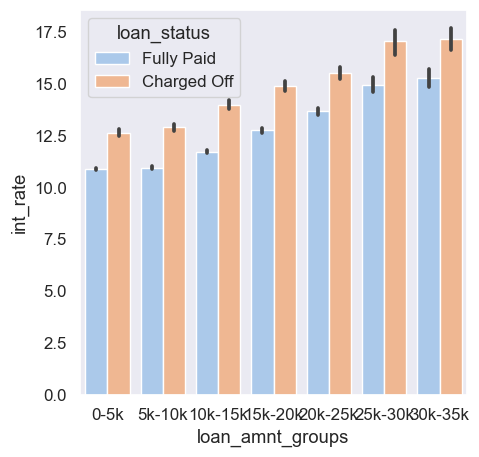

In [44]:
plt.figure(figsize=(5,5))
sns.barplot(data =loan_data,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="pastel")
plt.show()

Loan vs House Ownership

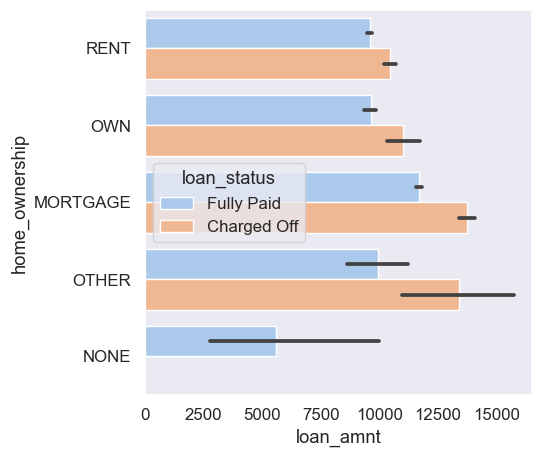

In [45]:
plt.figure(figsize=(5,5))
sns.barplot(data =loan_data,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()

Loan amount vs Grade

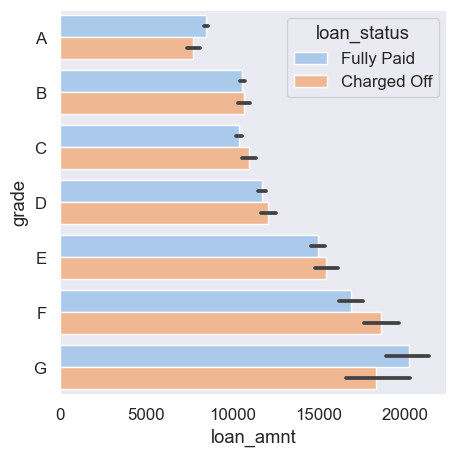

In [46]:
plt.figure(figsize=(5,5))
sns.barplot(data =loan_data,x='loan_amnt', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

grade vs interest rate

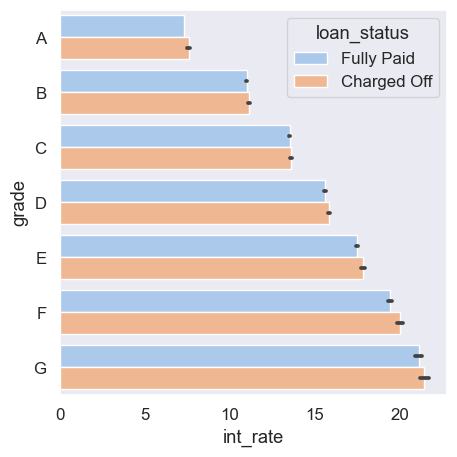

In [47]:
plt.figure(figsize=(5,5))
sns.barplot(data =loan_data,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

#  Observation on the basis of all the charts prepared above

Annual income vs loan purpose: Applicants taking loan for 'home improvement' and have income of 60k -70k

Annual income vs home ownership: Applicants whose home ownership is 'MORTGAGE and have income of 60-70k

Annual income vs int_rate: Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k

Loan Amount vs Interest Rate: Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %

Loan vs House Ownership: Applicants whose home ownership is 'MORTGAGE and have loan of 14-16k

Loan amount vs Grade: When grade is F and loan amount is between 15k-20k

grade vs interest rate: For grade G and interest rate above 20%

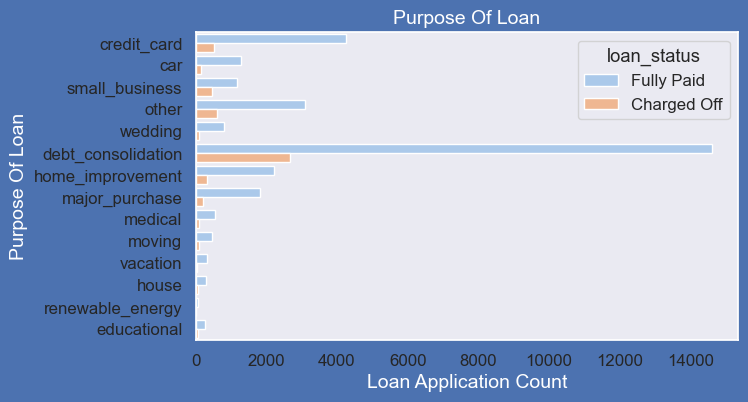

In [48]:
# Purpose Of Loan and it's count

plt.figure(figsize=(7,4),facecolor='b')
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=loan_data,hue='loan_status',palette='pastel')
ax.set_title('Purpose Of Loan',fontsize=14,color='w')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

Above Graphs shows that most of the loans were taken for the purpose of debt consolidation & paying credit card bill and number of charged off count also high too for these loans. 

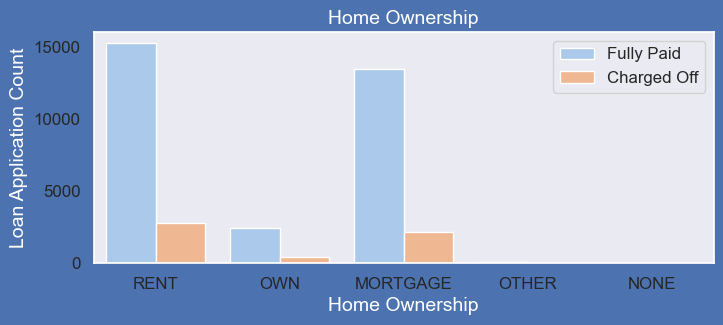

In [49]:
# Home Ownership and it's count

plt.figure(figsize=(8,3),facecolor='b')
ax = sns.countplot(x="home_ownership",data=loan_data,hue='loan_status',palette='pastel')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='w')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

Above graph shows that most of them living in rented home or mortgazed their home and Applicant numbers are high from these categories so charged off is high too.

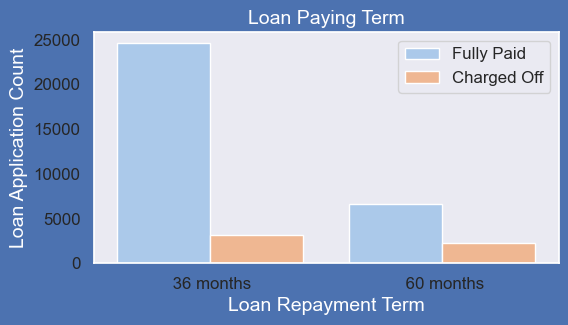

In [50]:
# Loan Paying Term and applicant count

plt.figure(figsize=(6,3),facecolor='b')
ax = sns.countplot(x="term",data=loan_data,hue='loan_status',palette='pastel')
ax.set_title('Loan Paying Term',fontsize=14,color='w')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

Above graph shows that those who had taken loan to repay in 60 months had more % of number of applicants getting charged off as compared to applicants who had taken loan for 36 months.

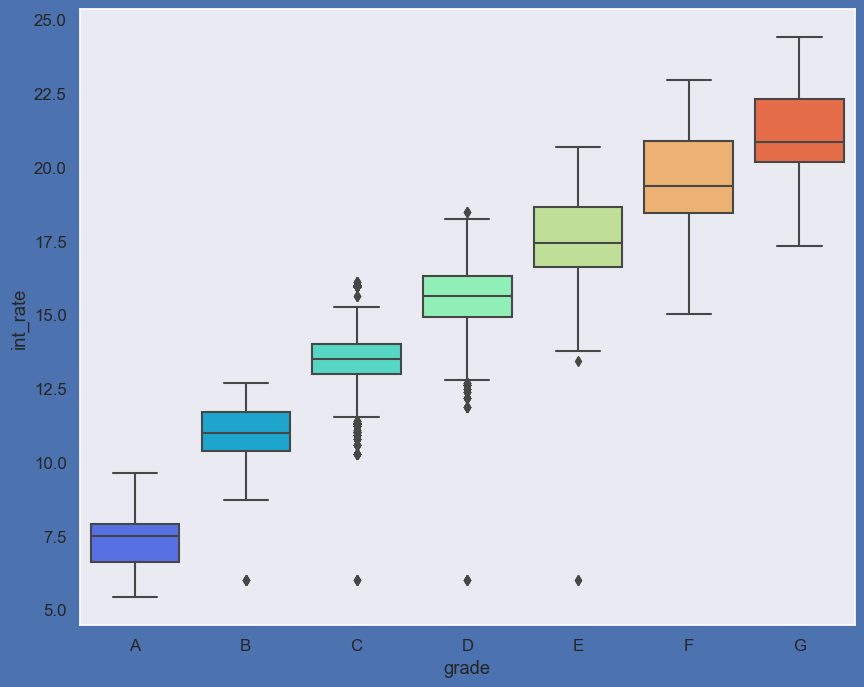

In [51]:
# Grade vs Interest Rate

plt.figure(figsize=(10,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='grade', data =loan_data,palette='rainbow',order = 'ABCDEFG')
plt.show()

After seeing above graphs ít's clear that intrest rate is increasing with grades moving from A to F. The higher the borrower's credit grade,the lower the interest rate offered to that borrower on a loan.

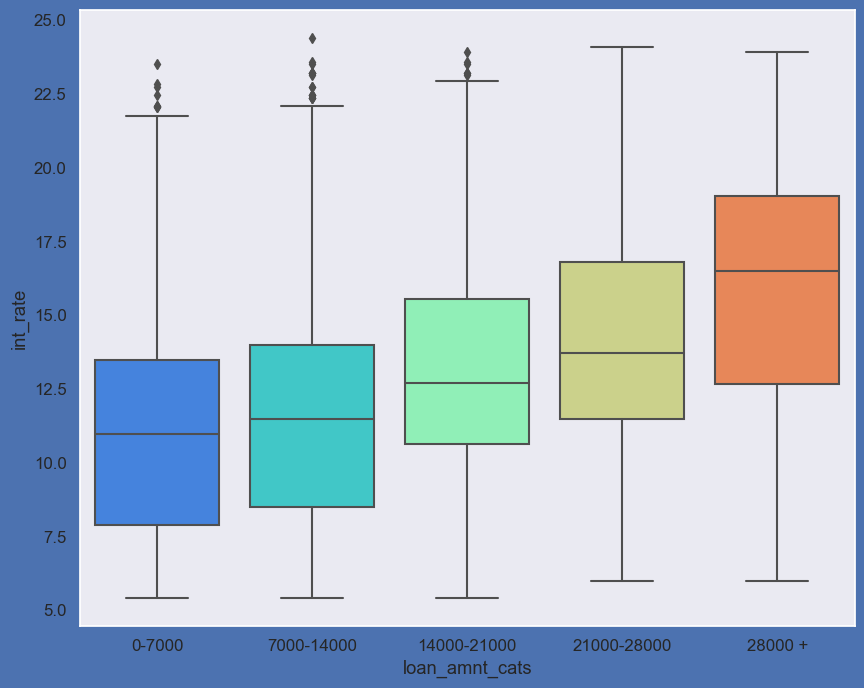

In [52]:
# Loan Amount vs Interest Rate
plt.figure(figsize=(10,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='loan_amnt_cats', data =loan_data,palette='rainbow')
plt.show()

From above graph it's clear that intrest rate is increasing with loan amount increase. This may be probably when loan amount is more it is taken for longer loan term, we saw earlier that longer the loan term more the interest rate.